In [96]:
# Imports of general use
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from music_loading import music_loading
from helper_data import helper_data
from plot_PeDF import plot_PeDF
from plot_ODF import plot_ODF
import sounddevice as sd

# Aqui você coloca o nome da música que vc quer dar uma olhada
filename = "120bpm_jazz.wav"
# Aqui você decide se quer uma wavelet de 5 níveis, de 1 só, ou de quantos for possível pro sinal!
nivel_wavelet = 5

# Código que carrega a música
musica_inteira = music_loading(filename, sample_rate=44100)

musica = musica_inteira[2**19:2**19+2**19] #Selecionando apenas de 12.889s até 23.78s

# Geração de ODFs e PeDFs
ODF_SET, PeDF_FULL_SET, PeDF_PARTIAL_SET = helper_data(musica, nivel_wavelet)

In [88]:
# Ouvir Trecho
import pywt
import pywt.data
coif3 = pywt.Wavelet('coif3')
coeffs = pywt.wavedec(musica, coif3, level = 1)
sd.play(musica, 44100/4)

1 amostra na ODF equivale a 158.51ms
A ODF tem 75 amostras


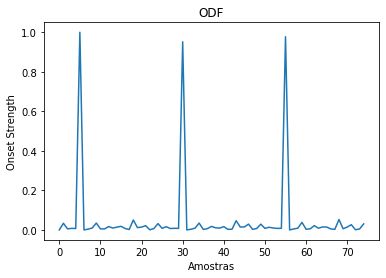

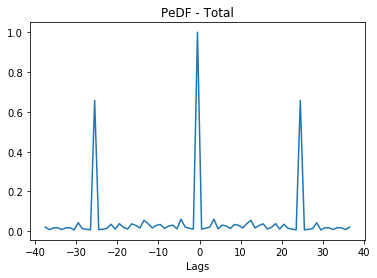

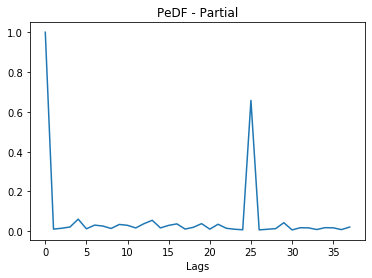

In [100]:
# Visualização

index = 2 # #cAN, cDN, cD(N-1), cD(N-2), .... based in level = N

plot_ODF(ODF_SET[index])
plot_PeDF(PeDF_FULL_SET[index], form="full")
plot_PeDF(PeDF_PARTIAL_SET[index], form="partial")
print(f"1 amostra na ODF equivale a {np.round((2**19/44100)/len(ODF_SET[index])*1000,2)}ms")
print(f"A ODF tem {len(ODF_SET[index])} amostras")